In [1]:
# import các thư viện cần thiết
import tensorflow as tf
# đọc dữ liệu
# training set gồm 60.000 ảnh các chữ số viết tay và test set gồm 10.000 ảnh các chữ số.
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() 
# load_data gọi ra 4 biến mỗi biến gốm các array chứa rất nhiều ảnh trong đó (huấn luyện, nhãn), (test)
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
#Ảnh trong bộ training
#plt.imshow(training_images[0])
#training_images.shape #Bộ training gồm 60000 ảnh là một array 3 chiều, ảnh xám không có ba màu xanh dương, xanh lục, đỏ
#training_images[0].shape #Kích cỡ (28, 28)
#training_labels[0] #Nhãn là số nguyên từ 0-9

In [3]:
# Import các lớp tích chập
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

#Khởi tạo mạng Sequential 
import tensorflow as tf
from tensorflow.keras.models import Sequential

# Chuẩn hóa lại dữ liệu bằng cách chia các giá trị của pixel cho 255.0
# Sử dụng test_images, test_labels để làm tập validation


# Khởi tạo model (Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT)
model = Sequential()

# Thêm một lớp tích chập + lớp Activation: relu
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))

#model.add(Conv2D(32,(3,3), input_shape=(28,28,1)))
#model.add(Activation('relu'))

# Thêm một lớp Max Pooling
model.add(MaxPooling2D(2,2))

# Thêm một lớp duỗi
model.add(Flatten())

# Kiểm tra model
model.summary()


#Thêm một lớp Dense 128 + lớp Activation: relu
model.add(Dense(128, activation='relu'))

# Thêm một lớp Dense 10 + lớp Activation: Softmax
model.add(Dense(10, activation="softmax"))

# Chú ý thêm lớp Activation Softmax
# Kiểm tra lại mô hình
model.summary()

# Xử lý dữ liệu ảnh
training_images.shape

# Chuẩn hóa data đưa vào các giá trị từ 0-1
training_images = training_images / 255.0

# Đưa vào data 4 chiều(số lượng ảnh, kích cỡ chiều dài, kích cỡ chiều rộng, số lớp của 1 ảnh )
training_images = training_images.reshape(60000,28,28,1) #Ảnh xám nên chỉ có 1 lớp 

#Chuẩn hóa tập Validation
#Kiểm tra chiều đầu tiên
test_images.shape

# Chuẩn hóa hình dạng ảnh
test_images = test_images / 255.0
# Rest lại 
test_images = test_images.reshape(10000, 28, 28, 1)

# Kiểm tra nhãn của training
training_labels.shape #số lượng tương ứng vs số lượng ảnh gồm 60000 ảnh trải dài từ 0-9



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                      

(60000,)

In [4]:
# Thêm một hàm tối ưu cho model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='acc') #Đây là hàm loss có thể làm việc luôn vs nhãn chính là 1 số

# Tiến hành training dữ liệu
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1453 - acc: 0.9572 - val_loss: 0.0557 - val_acc: 0.9826
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0493 - val_acc: 0.9838
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0319 - acc: 0.9898 - val_loss: 0.0527 - val_acc: 0.9833
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0554 - val_acc: 0.9827
Epoch 5/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0153 - acc: 0.9949 - val_loss: 0.0485 - val_acc: 0.9860
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0110 - acc: 0.9963 - val_loss: 0.0450 - val_acc: 0.9873
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0082 - acc: 0.9971 - val_loss: 0.0572 - val_acc: 0.9846
Epoch 8/10
1875/1875 [==========================

In [5]:
#Thêm các thư viện cần thiết
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
#Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ta sẽ chia ra 50.000 dữ liệu cho training set và 10.000 dữ liệu cho validation set.
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000] 
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape) 
# Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_val = X_val.reshape (X_val.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) 
#One hot encoding label (Y) 
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical (y_val, 10)
Y_test = np_utils.to_categorical (y_test, 10)
print('Dữ liệu y ban đầu', y_train[0])
print('Dữ liệu y sau one-hot encoding',Y_train[0])
#Định nghĩa model 
model = Sequential()

# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3 
# dùng hàm sigmoid làm activation và chỉ rõ input shape cho layer đầu tiên 
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
# Thêm Convolutional layer 
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer 
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer chuyển từ tensor sang vector 
model.add(Flatten())
#Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
#Output layer với 10 node và dùng softmax function để chuyển sang xác suất
model.add(Dense(10, activation='softmax'))
#Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function. 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Thực hiện train model với data 
H=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)


(50000, 28, 28)
Dữ liệu y ban đầu 5
Dữ liệu y sau one-hot encoding [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Epoch 1/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.3165 - accuracy: 0.9112 - val_loss: 0.0732 - val_accuracy: 0.9814
Epoch 2/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.0562 - accuracy: 0.9832 - val_loss: 0.0562 - val_accuracy: 0.9848
Epoch 3/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.0352 - accuracy: 0.9906 - val_loss: 0.0456 - val_accuracy: 0.9868
Epoch 4/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.0238 - accuracy: 0.9932 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 5/10
1563/1563 [==============================] - 110s 71ms/step - loss: 0.0175 - accuracy: 0.9951 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 6/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0450 - val_accuracy: 0.9871
Epoch 7/10
1563/156

1/1 [==============================] - 0s 31ms/step
Giá trị dự đoán: Số  6


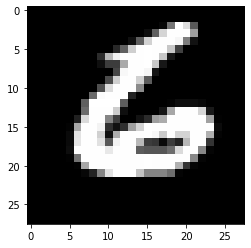

In [7]:
#Dự đoán ảnh 
plt.imshow(X_test[9999].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[9999].reshape(1,28,28,1))
print('Giá trị dự đoán: Số ',np.argmax(y_predict))